In [1]:
#import all libraries
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
# load the datasets
trainingData = pd.read_csv("../titanic/train.csv")


In [3]:
# viewing the data sample
trainingData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
trainingData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
l = trainingData['Age'].unique()
l.sort()
l

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ,   nan])

In [6]:
#Label Encoder for 'Embarked'#
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
imputer = SimpleImputer(strategy='constant', fill_value=0)
Age_Imputer = SimpleImputer(strategy='mean')

#Fill missing values b4 encoding
trainingData['Embarked'] = trainingData['Embarked'].fillna('C')  #for Embarked
trainingData['Age'] = Age_Imputer.fit_transform(trainingData[['Age']])

#encode 'Embarked' column
trainingData['Embarked'] = label_encoder.fit_transform(trainingData['Embarked'])

trainingData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,0


In [7]:
#check null
trainingData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [8]:
# show all columns

X = ['Survived', 'Pclass', 'Age', 'SibSp','Sex',
       'Parch', 'Fare', 'Embarked']
X_features = trainingData[X]

X_features_encoded = pd.get_dummies(trainingData[X], drop_first=True)

X_features_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_male
0,0,3,22.0,1,0,7.2500,2,True
1,1,1,38.0,1,0,71.2833,0,False
2,1,3,26.0,0,0,7.9250,2,False
3,1,1,35.0,1,0,53.1000,2,False
4,0,3,35.0,0,0,8.0500,2,True


Text(0.5, 1.0, 'Correlation Heatmap')

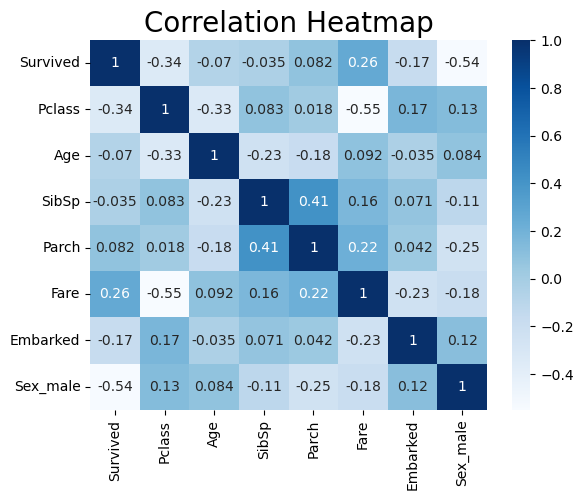

In [9]:
#correlation heatmap
heatmap =  sns.heatmap(X_features_encoded.corr(), cmap = "Blues", annot = True)
heatmap.set_title("Correlation Heatmap", fontdict={'fontsize':20})

In [10]:
#feature selection
"""
    Pclass : rejected
    Age : Rejected
    SibSp : Rejected
    Fare : Accepted
    Parch: Accepted
    Sex: Accepted
    Embarked: Accepted
"""

#rename column back
X_features_encoded = X_features_encoded.rename(columns={'Sex_male' : 'Sex'})


Final_X = ['Age','Sex','Fare','Embarked']
Final_X_features = X_features_encoded[Final_X]
Y = trainingData['Survived']

Final_X_features

,Age,Sex,Fare,Embarked
0,22.000000,True,7.2500,2
1,38.000000,False,71.2833,0
2,26.000000,False,7.9250,2
3,35.000000,False,53.1000,2
4,35.000000,True,8.0500,2
...,...,...,...,...
886,27.000000,True,13.0000,2
887,19.000000,False,30.0000,2
888,29.699118,False,23.4500,2
889,26.000000,True,30.0000,0


In [11]:
#seperate the testing data
testingData = pd.read_csv("../titanic/test.csv")
testX_features = ['Age','Sex','Fare', 'Embarked']
testX = testingData[testX_features]

#fill missing vals in Age
testX['Age'] = Age_Imputer.fit_transform(testX[['Age']])

#encode the ['Embarked']
testX['Embarked'] = testX['Embarked'].fillna('C')

testX['Embarked'] = label_encoder.fit_transform(testX['Embarked'])

#get_dummies for testing data too
testX_encoded = pd.get_dummies(testX, drop_first=True)

#rename the coulmn
testX_encoded = testX_encoded.rename(columns={'Sex_male':'Sex'})

#reorder the coulmns to match the fitting data
testX_encoded = testX_encoded[Final_X_features.columns]
testX_encoded

C:\Users\heroh\AppData\Local\Temp\ipykernel_15380\3965161287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testX['Age'] = Age_Imputer.fit_transform(testX[['Age']])
C:\Users\heroh\AppData\Local\Temp\ipykernel_15380\3965161287.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testX['Embarked'] = testX['Embarked'].fillna('C')
C:\Users\heroh\AppData\Local\Temp\ipykernel_15380\3965161287.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,Age,Sex,Fare,Embarked
0,34.50000,True,7.8292,1
1,47.00000,False,7.0000,2
2,62.00000,True,9.6875,1
3,27.00000,True,8.6625,2
4,22.00000,False,12.2875,2
...,...,...,...,...
413,30.27259,True,8.0500,2
414,39.00000,False,108.9000,0
415,38.50000,True,7.2500,2
416,30.27259,True,8.0500,2


In [12]:
#impute the testX
imputer = SimpleImputer(strategy='constant', fill_value=0)

testX_encoded = pd.DataFrame(imputer.fit_transform(testX_encoded), columns = testX_encoded.columns)
Final_X_features = pd.DataFrame(imputer.fit_transform(Final_X_features), columns = Final_X_features.columns)


testX_encoded
#Final_X_features

,Age,Sex,Fare,Embarked
0,34.50000,1.0,7.8292,1.0
1,47.00000,0.0,7.0000,2.0
2,62.00000,1.0,9.6875,1.0
3,27.00000,1.0,8.6625,2.0
4,22.00000,0.0,12.2875,2.0
...,...,...,...,...
413,30.27259,1.0,8.0500,2.0
414,39.00000,0.0,108.9000,0.0
415,38.50000,1.0,7.2500,2.0
416,30.27259,1.0,8.0500,2.0


In [13]:
#Scaliing the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
final_X_features_scaled = scaler.fit_transform(Final_X_features)
testX_scaled = scaler.transform(testX_encoded)

In [14]:
#Decision Tree classifier model
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(Final_X_features, Y)

preds2 = model2.predict(testX_encoded)
print(preds2)

[0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0
 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0
 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0
 1 0 1 0 1 0 0 1 0 0 0]


In [15]:
#check accuracy
trueResults = pd.read_csv("../titanic/gender_submission.csv")
testY = trueResults['Survived']
conf1 = confusion_matrix(testY, preds2)
accu1 = accuracy_score(testY, preds2)
mae1 = mean_absolute_error(preds2, testY)

In [16]:
print("MODEL: Decision Tree Classifier")
print(f"Confusion Matrix : \n {conf1}")
print(f"Accuracy Score : {accu1}")
print(f"Mean Absolute Error : {mae1}")

MODEL: Decision Tree Classifier
Confusion Matrix : 
 [[224  42]
 [ 49 103]]
Accuracy Score : 0.7822966507177034
Mean Absolute Error : 0.21770334928229665


In [17]:
#Random Forest classifier model
from sklearn.ensemble import RandomForestClassifier

In [18]:
#model 3
#best max_leaf_nodes amount = 15
model3 = RandomForestClassifier(max_leaf_nodes=3, random_state=42)

#fitting
model3.fit(Final_X_features, Y)

#predictions
preds3 = model3.predict(testX_encoded)
print(preds3)

#confusion matrix and accuracy score
conf2 = confusion_matrix(testY,preds3)
accu2 = accuracy_score(testY, preds3)
mae2 = mean_absolute_error(preds3, testY)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [19]:
print("MODEL: Random Forest Classifier")
print(f"Confusion Matrix : \n {conf2}")
print(f"Accuracy Score : {accu2}")
print(f"Mean Absolute Error : {mae2}")

MODEL: Random Forest Classifier
Confusion Matrix : 
 [[266   0]
 [  0 152]]
Accuracy Score : 1.0
Mean Absolute Error : 0.0


In [20]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [21]:
#model 4
model4 = LogisticRegression(
    random_state=42,
    solver='lbfgs', #best solver for small datasets
    max_iter=1000, #Increase iterations for better convergence
    C=1.0, #Inverse of regularix=zation strength (smaller = stronger)
    penalty='l2', #Ridge Regularization
    class_weight='balanced' #Adjusts weight inversely proportional to class frequencies
)

model4.fit(Final_X_features, Y)

preds4 = model4.predict(testX_encoded)
print(preds4)

#metrics
conf3 = confusion_matrix(testY, preds4)
accu3 = accuracy_score(testY, preds4)
mae3 = mean_absolute_error(testY, preds4)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 0]


In [22]:
print("MODEL: Logistic Regression")
print(f"Confusion Matrix : \n {conf3}")
print(f"Accuracy Score : {accu3}")
print(f"Mean Absolute Error : {mae3}")

MODEL: Logistic Regression
Confusion Matrix : 
 [[253  13]
 [  0 152]]
Accuracy Score : 0.9688995215311005
Mean Absolute Error : 0.03110047846889952


In [23]:
#Support Vector Machine
from sklearn import svm

In [24]:
model5 = svm.SVC(kernel='rbf',C = 500.0, gamma='scale')

model5.fit(Final_X_features, Y)

preds5 = model5.predict(testX_encoded)
print(preds5)

#metrics
conf4 = confusion_matrix(testY, preds5)
accu4 = accuracy_score(testY, preds5)
mae4 = mean_absolute_error(testY, preds5)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 1 0 1 0 0 0]


In [25]:
print("MODEL: SVM")
print(f"Confusion Matrix : \n {conf4}")
print(f"Accuracy Score : {accu4}")
print(f"Mean Absolute Error : {mae4}")

MODEL: SVM
Confusion Matrix : 
 [[253  13]
 [  0 152]]
Accuracy Score : 0.9688995215311005
Mean Absolute Error : 0.03110047846889952


In [26]:
#use of train_test_split is done here
#seperate the data
train_X, test_X, train_Y, test_Y = train_test_split(Final_X_features,
                                                    Y,
                                                    test_size=0.3,
                                                    random_state=42)

In [27]:
#DecisionTree

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(train_X, train_Y)

dtree_pred = dtree.predict(testX_encoded)
print(dtree_pred)

dtree_accu = accuracy_score(testY, dtree_pred)

print(f'Accuract Score: {dtree_accu}')

[0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0
 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 0 0 1 0 0 0]
Accuract Score: 0.8157894736842105


In [28]:
#RandomForest
random_Forest = RandomForestClassifier(max_leaf_nodes = 15, random_state=42)
random_Forest.fit(train_X, train_Y)

rForest_pred = random_Forest.predict(testX_encoded)
print(rForest_pred)

rForest_accu = accuracy_score(testY, rForest_pred)

print(rForest_accu)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]
0.9354066985645934
